In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import unicodedata
import re

plt.style.use('ggplot')

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
arabic_stopwords = set(stopwords.words('arabic'))
stop_word_comp = {"،","آض","آمينَ","آه","آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى","أقبل","أقل","أكثر","ألا","أم","أما","أمامك","أمامكَ","أمسى","أمّا","أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم","أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما","أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك","إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ","اثر","اجل","احد","اخرى","اخلولق","اذا","اربعة","ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان","اللتيا","اللتين","اللذان","اللذين","اللواتي","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع","بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى","بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك","تلكم","تلكما","تم","تينك","تَيْنِ","تِه","تِي","ثلاثة","ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا","حاليا","حاي","حتى","حرى","حسب","حم","حوالى","حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا","ذات","ذاك","ذانك","ذانِ","ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا","ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح","رجع","رويدك","ريث","رُبَّ","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا","شرع","شَتَّانَ","صار","صباح","صفر","صهٍ","صهْ","ضد","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا","عدة","عدد","عدم","عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند","عندما","عوض","عين","عَدَسْ","عَمَّا","غدا","غير","ـ","ف","فان","فلان","فو","فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد","قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا","كذلك","كرب","كل","كلا","كلاهما","كلتا","كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما","كي","كيت","كيف","كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما","لدن","لدى","لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما","لكي","لكيلا","للامم","لم","لما","لمّا","لن","لنا","له","لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ","لَسْتُ","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ","لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ","لَيْسَا","لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام","ماذا","مازال","مافتئ","مايو","متى","مثل","مذ","مساء","مع","معاذ","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك","مليار","مليون","مما","ممن","من","منذ","منها","مه","مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ","ها","هاؤم","هاكَ","هاهنا","هبّ","هذا","هذه","هكذا","هل","هلمَّ","هلّا","هم","هما","هن","هنا","هناك","هنالك","هو","هي","هيا","هيت","هيّا","هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","هَيْهَاتَ","و","و6","وا","واحد","واضاف","واضافت","واكد","وان","واهاً","واوضح","وراءَك","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","ّأيّان"}
from nltk.stem.isri import ISRIStemmer
# from nltk.stem import PorterStemmer
# from wordcloud import WordCloud

# from camel_tools.lemmatizer import Lemmatizer

# import spacy
# nlp = spacy.load("en_core_web_sm")
# stemmer = PorterStemmer()

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, GlobalAveragePooling1D

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [129]:
column_names = ['label', 'message']

neg = pd.read_csv('/kaggle/input/train-test-data/train_Arabic_tweets_negative_20190413.tsv', sep='\t', names=column_names, encoding='utf-8' )
pos = pd.read_csv('/kaggle/input/train-test-data/train_Arabic_tweets_positive_20190413.tsv', sep='\t', names=column_names, encoding='utf-8')
train_pos = pd.read_csv('/kaggle/input/train-test-data/test_Arabic_tweets_positive_20190413.tsv', sep='\t', names=column_names, encoding='utf-8')
train_neg = pd.read_csv('/kaggle/input/train-test-data/test_Arabic_tweets_positive_20190413.tsv', sep='\t', names=column_names, encoding='utf-8')


train_data = pd.concat([pos, neg, train_pos, train_neg], axis=0)

train_data = train_data.reset_index(drop=True)

print(train_data.shape)

(56779, 2)


In [130]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56779 entries, 0 to 56778
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    56779 non-null  object
 1   message  56779 non-null  object
dtypes: object(2)
memory usage: 887.3+ KB


In [131]:
print(train_data.duplicated().sum())
train_data = train_data.drop_duplicates()
print(train_data.duplicated().sum())

24218
0


In [132]:
train_data['label'].value_counts()

label
pos    17466
neg    15095
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

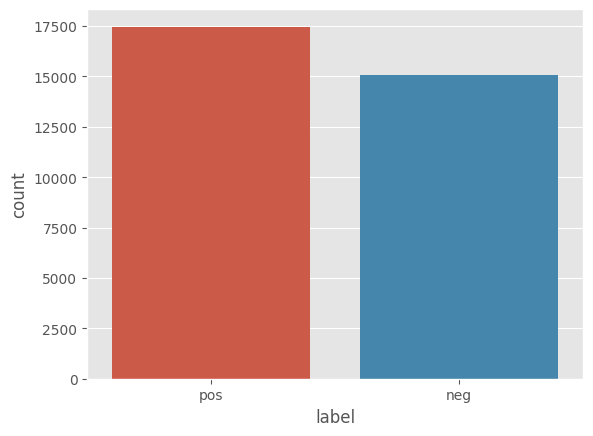

In [133]:
sns.countplot(x=train_data['label'])

In [134]:
lens = train_data["message"].apply(len)
print(lens)
print("\n",lens.max())

0         97
1         75
2         15
3        114
4         94
        ... 
51014     24
51015     22
51019     10
51021     10
51022     99
Name: message, Length: 32561, dtype: int64

 8109


In [135]:
train_data['label'] = train_data['label'].map({'pos': 1, 'neg': 0})
train_data.head()

,label,message
0,1,نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...
1,1,وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...
2,1,من الخير نفسه 💛
3,1,#زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...
4,1,الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...


In [136]:
train_data['message'][400]

'#يوميات_محسن_بن_دقله %تركيزي عالشعر واللوك لجديد % ع كلامك 😅 المهم سواء قلت لنا او لا احنا بنصوت لك ..احنا ند…'

In [137]:
print(arabic_stopwords)
print("\n", len(arabic_stopwords))


{'ع', 'سمعا', 'يا', 'وا', 'متى', 'خمس', 'خال', 'حمٌ', 'كلَّا', 'كلا', 'ذانك', 'فيها', 'يوليو', 'هؤلاء', 'أوه', 'يورو', 'بعدا', 'سرا', 'شَتَّانَ', 'تينك', 'فيما', 'اللائي', 'كذلك', 'عليك', 'أنتم', 'إليكنّ', 'ثمانين', 'آناء', 'إياهن', 'لاسيما', 'ج', 'ياء', 'صبر', 'أول', 'عاد', 'تلك', 'لكي', 'خمسمئة', 'سادس', 'أولالك', 'رابع', 'حزيران', 'قد', 'هَجْ', 'إياهما', 'لعمر', 'كيت', 'تفعلان', 'حيثما', 'أوّهْ', 'لسن', 'شبه', 'بات', 'فإن', 'ما أفعله', 'ذ', 'ماي', 'هن', 'ثلاثمائة', 'حاء', 'نفس', 'صاد', 'أمامكَ', 'لوما', 'لكنَّ', 'جانفي', 'أربعمائة', 'لهما', 'كل', 'أنّى', 'هذا', 'إياكما', 'ذَيْنِ', 'تِه', 'فإذا', 'كأن', 'إياكم', 'تارة', 'ذان', 'حاي', 'عند', 'إيه', 'بخ', 'ذاك', 'هاته', 'طاء', 'أمام', 'مازال', 'آنفا', 'بهم', 'لهم', 'هاك', 'درى', 'التي', 'ذال', 'ثلاثمئة', 'أمامك', 'حار', 'نحن', 'رُبَّ', 'تي', 'بعض', 'ثاني', 'إذن', 'صهْ', 'ممن', 'ؤ', 'هَذَيْنِ', 'بَسْ', 'الذين', 'لم', 'مه', 'كاف', 'ما', 'تشرين', 'ح', 'تانِك', 'ثمّ', 'أُفٍّ', 'دينار', 'عَدَسْ', 'اتخذ', 'خمسة', 'ص', 'حبذا', 'وهو', 'أينما',

In [138]:

with open('/kaggle/input/emoji-data/emojis.csv','r',encoding='utf-8') as f:
    lines = f.readlines()
    emojis_ar = {}
    for line in lines:
        line = line.strip('\n').split(';')
        emojis_ar.update({line[0].strip():line[1].strip()})

In [139]:
# !pip install aiogoogletrans
# !pip install unidecode

In [140]:
from __future__ import unicode_literals

def remove_emoji(text):
    emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    return text

import unicodedata
from unidecode import unidecode

def emoji_native_translation(text):
    text = text.lower()
    loves = ["<3", "♥",'❤']
    smilefaces = []
    sadfaces = []
    neutralfaces = []

    eyes = ["8",":","=",";"]
    nose = ["'","`","-",r"\\"]
    for e in eyes:
        for n in nose:
            for s in ["\)", "d", "]", "}","p"]:
                smilefaces.append(e+n+s)
                smilefaces.append(e+s)
            for s in ["\(", "\[", "{"]:
                sadfaces.append(e+n+s)
                sadfaces.append(e+s)
            for s in ["\|", "\/", r"\\"]:
                neutralfaces.append(e+n+s)
                neutralfaces.append(e+s)
            #reversed
            for s in ["\(", "\[", "{"]:
                smilefaces.append(s+n+e)
                smilefaces.append(s+e)
            for s in ["\)", "\]", "}"]:
                sadfaces.append(s+n+e)
                sadfaces.append(s+e)
            for s in ["\|", "\/", r"\\"]:
                neutralfaces.append(s+n+e)
                neutralfaces.append(s+e)

    smilefaces = list(set(smilefaces))
    sadfaces = list(set(sadfaces))
    neutralfaces = list(set(neutralfaces))
    t = []
    for w in text.split():
        if w in loves:
            t.append("حب")
        elif w in smilefaces:
            t.append("مضحك")
        elif w in neutralfaces:
            t.append("عادي")
        elif w in sadfaces:
            t.append("محزن")
        else:
            t.append(w)
    newText = " ".join(t)
    return newText

import emoji
def is_emoji(word):
    if word in emojis_ar:
        return True
    else:
        return False

def add_space(text):
    return ''.join(' ' + char if is_emoji(char) else char for char in text).strip()

from aiogoogletrans import Translator
translator = Translator()
import asyncio
loop = asyncio.get_event_loop()

def translate_emojis(words):
    word_list = list()
    words_to_translate = list()
    for word in words :
        t = emojis_ar.get(word.get('emoji'),None)
        if t is None:
            word.update({'translation':'عادي','translated':True})
            #words_to_translate.append('normal')
        else:
            word.update({'translated':False,'translation':t})
            words_to_translate.append(t.replace(':','').replace('_',' '))
        word_list.append(word)
    return word_list

def emoji_unicode_translation(text):
    text = add_space(text)
    words = text.split()
    text_list = list()
    emojis_list = list()
    c = 0
    for word in words:
        if is_emoji(word):
            emojis_list.append({'emoji':word,'emplacement':c})
        else:
            text_list.append(word)
        c+=1
    emojis_translated = translate_emojis(emojis_list)
    for em in emojis_translated:
        text_list.insert(em.get('emplacement'),em.get('translation'))
    text = " ".join(text_list)
    return text
    
def clean_emoji(text):
    text = emoji_native_translation(text)
    text = emoji_unicode_translation(text)
    return text

In [141]:
def remove_hashtages(text):
    text = re.sub("@[A-Za-z0-9_]+","", text)
    text = re.sub("#[A-Za-z0-9_]+","", text)
    return text

In [142]:
def clean_msg(text):
    text = re.sub('#\d+K\d+', ' ', text)  # years like 2K19
    text = re.sub('http\S+\s*', ' ', text)  # remove URLs
    text = re.sub('RT|cc', ' ', text)  # remove RT and cc
    text = re.sub('@[^\s]+',' ',text)
    text = remove_hashtages(text)
    text = clean_emoji(text)
    return text


In [143]:
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in arabic_stopwords and not word in stop_word_comp and len(word) >= 2] # Arlsdm
    return ' '.join(filtered_words)



def normalize_arabic(text):
    text = re.sub(r'[\u0617-\u061A\u064B-\u0652]', '', text) # remove eltaskel

    text = re.sub(r'\u0640', '', text) # remove ـ in arabic text 
     
    text = clean_msg(text)
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)  # remove punctuation
    
    text = re.sub('\s+', ' ', text)  
    
    text = remove_emoji(text)
    
    text = re.sub("\d+", " ", text)
    
    text = re.sub(r'[إأآا]', 'ا', text)
    text = re.sub(r'ى', 'ي', text)
    text = re.sub(r'ة', 'ه', text)
    text = re.sub(r'_', ' ', text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)

    text = re.sub(r'[^\u0621-\u063A\u0641-\u064A\s]', '', text)
    
    text = re.sub('\s+', ' ', text) 

    text = re.sub(r'\s+', ' ', text).strip()

    return text




stemmer = ISRIStemmer()
def stem_text(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

train_data['without_sropwords'] = train_data['message'].apply(remove_stopwords)
train_data['normalized'] = train_data['without_sropwords'].apply(normalize_arabic)
train_data['Stemmed'] = train_data['normalized'].apply(stem_text)
# train_data['message'] = train_data['message'].apply(remove_stopwords)
# train_data['message'] = train_data['message'].apply(normalize_arabic)
# train_data['message'] = train_data['message'].apply(stem_text)

# train_data['Stemmed'] = train_data['Normalized'].apply(lambda text: ' '.join([stemmer.stem(word) for word in text.split()]))

print(train_data.head())


   label                                            message  \
0      1  نحن الذين يتحول كل ما نود أن نقوله إلى دعاء لل...   
1      1  وفي النهاية لن يبقىٰ معك آحدإلا من رأىٰ الجمال...   
2      1                                    من الخير نفسه 💛   
3      1  #زلزل_الملعب_نصرنا_بيلعب كن عالي الهمه ولا ترض...   
4      1  الشيء الوحيد الذي وصلوا فيه للعالمية هو : المس...   

                                   without_sropwords  \
0  يتحول نود نقوله دعاء لله، تبحثوا فينا قوة، إنن...   
1  النهاية يبقىٰ معك آحدإلا رأىٰ الجمال روحك أماا...   
2                                              الخير   
3  #زلزل_الملعب_نصرنا_بيلعب عالي الهمه ترضى بغير ...   
4  الشيء الوحيد وصلوا للعالمية المسيار ..! ترى كا...   

                                          normalized  \
0  يتحول نود نقوله دعاء لله تبحثوا فينا قوه اننا ...   
1  النهايه يبقي معك احدالا راي الجمال روحك اماالم...   
2                                              الخير   
3  زلزل الملعب نصرنا بيلعب عالي الهمه ترضي بغير ا...   
4  ا

In [144]:

# train_data.to_csv("clean.csv", index=False)

clean = pd.read_csv('/kaggle/working/clean.csv', encoding='utf-8')
print(clean.head(10))
clean.tail(10)

   label                                            message
0      1   تحل نود نقل دعء لله بحث فين قوه انن كسر قوه التي
1      1         نهي يبق معك حدل راي جمل روح اماالمنبهر مظا
2      1                                                خير
3      1  زلزل لعب نصر لعب علي همه ترض بغر قمه جرد ساع ل...
4      1            شيء وحد وصل علم سير تري كان شجع درد نصر
5      1  تحد نصر حسبو نسي يالطواقي لنب وقف عنا ماح بحج ...
6      1                                احب انت ويه ومر سعه
7      1  تمل الل بود زرع صاب دور صاب دور ومع هتف دعء رز...
8      1  وين الي رقص زخت مطر خلو نشف لاه خلف يرز حسي كو...
9      1  لهم امن يرب علم انت ونا ومه سيد حمد صل الل سلم...


,label,message
32551,1,في جمع اسل ربي سمع دعء رفع سمء دءم بقء اسم دوء...
32552,1,ال لهم قوه رحه بال جاب لدع نتم
32553,1,اشف وش سوت شغل
32554,1,طعم جرب رفع يتم ولق فءد سمك سلم متز متز فطر مت...
32555,1,خير
32556,1,بكر تشف هلل
32557,1,خير قطر
32558,1,دقل
32559,1,شيه فرس
32560,1,ربي غفر للد لحب ءمن ءمن سلم سلم حيء نهم امو


In [145]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_count, train_data['label'], test_size=0.2, random_state=42, shuffle=True)
# X_train, X_test, y_train, y_test = train_test_split(X_tfidf, train_data['label'], test_size=0.2, random_state=42, shuffle=True)

X_train, X_test, y_train, y_test = train_test_split(
    X_count,                # Feature matrix (count features)
    train_data['label'],    # Target variable
    test_size=0.2,          # Proportion of the data to be used for testing
    random_state=42,        # Seed for reproducibility
    shuffle=True            # Whether to shuffle the data before splitting
)

In [146]:
print(X_train.shape, y_train.shape, y_test.shape, X_test.shape)

(26048, 8255) (26048,) (6513,) (6513, 8255)


In [147]:
# !pip install camel-tools

In [148]:
import camel_tools
from camel_tools.tokenizers.word import simple_word_tokenize

def tokeniz(text):
    text = simple_word_tokenize(text)
    return text
    
train_data['tokenized'] = train_data['Stemmed'].apply(tokeniz)


In [149]:
train_data['tokenized'].head()

0    [تحل, نود, نقل, دعء, لله, بحث, فين, قوه, انن, ...
1    [نهي, يبق, معك, حدل, راي, جمل, روح, اماالمنبهر...
2                                                [خير]
3    [زلزل, لعب, نصر, لعب, علي, همه, ترض, بغر, قمه,...
4    [شيء, وحد, وصل, علم, سير, تري, كان, شجع, درد, ...
Name: tokenized, dtype: object

In [150]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer(max_features=10000, min_df=2, max_df=0.95)
# X_tfidf = vectorizer.fit_transform(train_data['Stemmed'])
# df_count_vectorized = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# print(df_count_vectorized.head(10))




vectorizer = CountVectorizer(max_features=10000, min_df=2, max_df=0.95)
X_count = vectorizer.fit_transform(train_data['Stemmed'])
print(X_count.shape)

df_count_vectorized = pd.DataFrame(X_count.toarray(), columns=vectorizer.get_feature_names_out())

print(df_count_vectorized.head(10))

(32561, 8255)
   ءات  ءال  ءبد  ءثر  ءجر  ءجل  ءخذ  ءخر  ءد  ءدب  ...  يوم  يون  يوه  يوو  \
0    0    0    0    0    0    0    0    0   0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0   0    0  ...    0    0    0    0   
2    0    0    0    0    0    0    0    0   0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0   0    0  ...    0    0    0    0   
4    0    0    0    0    0    0    0    0   0    0  ...    0    0    0    0   
5    0    0    0    0    0    0    0    0   0    0  ...    0    0    0    0   
6    0    0    0    0    0    0    0    0   0    0  ...    0    0    0    0   
7    0    0    0    0    0    0    0    0   0    0  ...    0    0    0    0   
8    0    0    0    0    0    0    0    0   0    0  ...    0    0    0    0   
9    0    0    0    0    0    0    0    0   0    0  ...    0    0    0    0   

   يوي  يي  ييب  ييج  ييم  ييه  
0    0   0    0    0    0    0  
1    0   0    0    0    0    0  
2    0   0    0  

In [155]:
pip install --upgrade tensorflow

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 7.7 MB/s eta 0:00:000:00:0100:01
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.9.1 requires tensorflow~=2.16.1, but you have tensorflow 2.17.0 which is incompatible.
tensorflow-text 2.16.1 requires tensorflow<2.17,>=2.16.1; platform_machine != "arm64" or platform_system != "Darwin", but you have tensorflow 2.17.0 which is incompatible.
tf-keras 2.

In [158]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=128, input_length=100),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.GlobalAveragePooling1D(),
    Dropout(0.2),  # Dropout layer with a dropout rate of 50%
    tf.keras.layers.Dense(64, activation='relu'),
    Dropout(0.2),  # Dropout layer with a dropout rate of 50%
    tf.keras.layers.Dense(32, activation='relu'),
    Dropout(0.2),  # Dropout layer with a dropout rate of 50%
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with a specific learning rate
optimizer = Adam(learning_rate=0.0001) 
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# model.summary()

In [161]:
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Epoch 1/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 339s 520ms/step - accuracy: 0.5358 - loss: 0.6907 - val_accuracy: 0.5269 - val_loss: 0.6917
Epoch 2/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 339s 520ms/step - accuracy: 0.5412 - loss: 0.6899 - val_accuracy: 0.5269 - val_loss: 0.6918
Epoch 3/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 340s 521ms/step - accuracy: 0.5376 - loss: 0.6905 - val_accuracy: 0.5269 - val_loss: 0.6917
Epoch 4/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 340s 521ms/step - accuracy: 0.5374 - loss: 0.6904 - val_accuracy: 0.5269 - val_loss: 0.6917
Epoch 5/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 340s 521ms/step - accuracy: 0.5357 - loss: 0.6907 - val_accuracy: 0.5269 - val_loss: 0.6918
Epoch 6/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 340s 521ms/step - accuracy: 0.5455 - loss: 0.6892 - val_accuracy: 0.5269 - val_loss: 0.6917
Epoch 7/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 350s 537ms/step - accuracy: 0.5329 - loss: 0.6910 - val_accuracy: 0.5269 - val_loss: 0.6919
Epoch 8/15
652/652 ━━━━━━━━━━━━━━━━━━━━ 340s 522ms/step - accuracy: 0.5392 -

In [163]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)  